# Chapter 11

# 11.9.3. PK/PD in personalized medicine

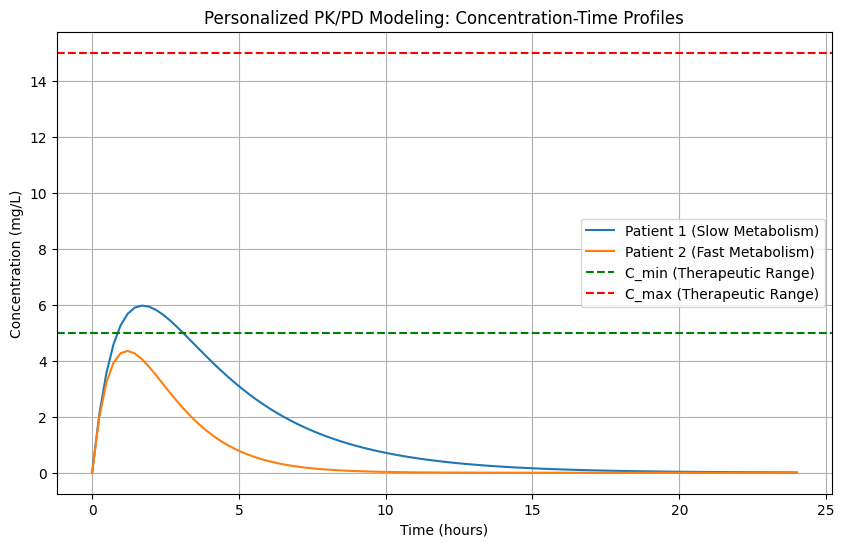

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PK model (including volume of distribution)
def pk_model(t, ka, ke, dose, Vd):
    if ka == ke:
        return np.zeros_like(t)
    concentration = (dose * ka) / (Vd * (ka - ke)) * (np.exp(-ke * t) - np.exp(-ka * t))
    return concentration

# Parameters for two patients with different elimination rates (ke)
ka = 1.0          # Absorption rate constant (1/hour)
ke_patient1 = 0.3 # Elimination rate for Patient 1 (slow metabolism)
ke_patient2 = 0.7 # Elimination rate for Patient 2 (fast metabolism)
Vd = 50           # Volume of distribution (L)
dose = 500        # Dose in mg

# Time points (hours)
time = np.linspace(0, 24, 100)

# Simulate concentration-time profiles for both patients
concentration_patient1 = pk_model(time, ka, ke_patient1, dose, Vd)
concentration_patient2 = pk_model(time, ka, ke_patient2, dose, Vd)

# Therapeutic range (mg/L)
C_min = 5.0   # Minimum therapeutic concentration
C_max = 15.0  # Maximum therapeutic concentration

# Plot concentration-time profiles
plt.figure(figsize=(10, 6))
plt.plot(time, concentration_patient1, label='Patient 1 (Slow Metabolism)')
plt.plot(time, concentration_patient2, label='Patient 2 (Fast Metabolism)')
plt.axhline(C_min, color='green', linestyle='--', label='C_min (Therapeutic Range)')
plt.axhline(C_max, color='red', linestyle='--', label='C_max (Therapeutic Range)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Personalized PK/PD Modeling: Concentration-Time Profiles')
plt.legend()
plt.grid(True)
plt.show()